C:\Users\devas\AppData\Local\Temp\ipykernel_21656\1370755848.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


Epoch 1/5


C:\Users\devas\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 97s 184ms/step - accuracy: 0.5024 - loss: 0.7136 - val_accuracy: 0.5644 - val_loss: 0.6914
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 166s 231ms/step - accuracy: 0.5161 - loss: 0.6927 - val_accuracy: 0.5669 - val_loss: 0.6682
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 237ms/step - accuracy: 0.6160 - loss: 0.6438 - val_accuracy: 0.6302 - val_loss: 0.6271
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 147s 248ms/step - accuracy: 0.6907 - loss: 0.5778 - val_accuracy: 0.6665 - val_loss: 0.6070
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 134s 231ms/step - accuracy: 0.7392 - loss: 0.5217 - val_accuracy: 0.7019 - val_loss: 0.5828
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.7059 - loss: 0.5829


Model saved as 'stacked_rnn_sentiment_model.h5'


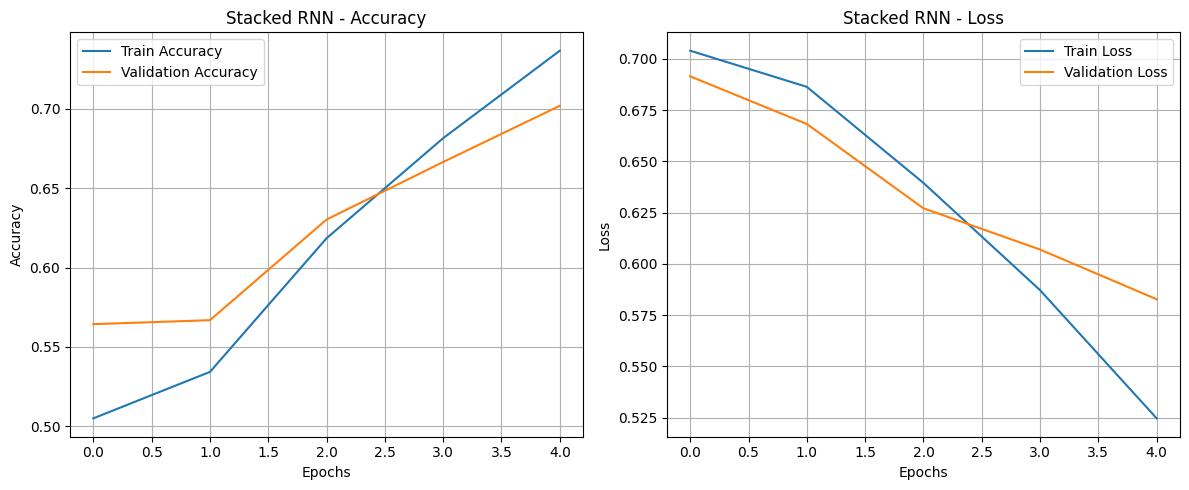

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step


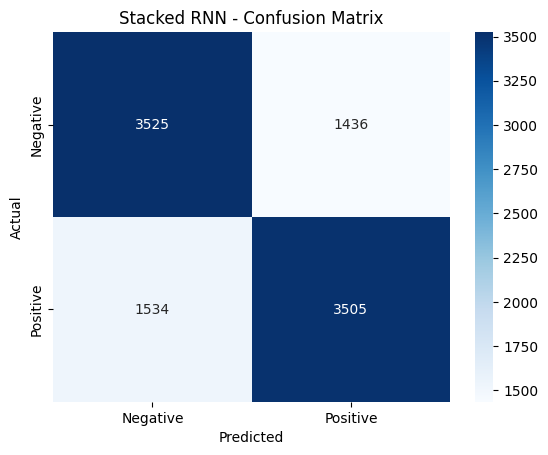

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

data = pd.read_csv("IMDB Dataset.csv")
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
rnn_model.add(SimpleRNN(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))
rnn_model.add(SimpleRNN(64, dropout=0.15, recurrent_dropout=0.15))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train, Y_train, batch_size=64, epochs=5, validation_split=0.2)

rnn_loss, rnn_acc = rnn_model.evaluate(X_test, Y_test)

rnn_model.save("stacked_rnn_sentiment_model.h5")
print("Model saved as 'stacked_rnn_sentiment_model.h5'")

def plot_accuracy_loss(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_accuracy_loss(rnn_history, "Stacked RNN")

def plot_confusion_matrix(true, pred, title):
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

y_pred = rnn_model.predict(X_test).round()
plot_confusion_matrix(Y_test, y_pred, "Stacked RNN")
